In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import os
from sklearn.model_selection import train_test_split

# Hàm đọc ảnh và label từ folder
def load_data_from_folder(folder_path):
    images = []
    labels = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.png'):
            img_path = os.path.join(folder_path, filename)
            #print(f"Reading image from: {img_path}") # Print image path
            img = cv2.imread(img_path)
            
            if img is None:
                print(f"Failed to load image at {img_path}. Skipping...")
                continue
                
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Resize the image to 256x256
            img = cv2.resize(img, (256, 256))

            label = int(filename.split('_')[0])

            images.append(img)
            labels.append(str(int(label) - 1))

    return np.array(images), np.array(labels)

# Load dữ liệu
X, Y = load_data_from_folder('extracted_data')
X = X.astype("float32") / 255.0
Y = keras.utils.to_categorical(Y, 11)

# Chia dữ liệu thành tập train và tập test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

# Xây dựng mô hình
model = keras.Sequential([
    layers.Input(shape=(256, 256, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(11, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Kiểm tra độ chính xác trên tập kiểm tra
test_score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {test_score[0]}")
print(f"Test accuracy: {test_score[1]}")


Failed to load image at extracted_data\011_004_004.png. Skipping...
Failed to load image at extracted_data\011_005_003.png. Skipping...
Failed to load image at extracted_data\011_005_004.png. Skipping...
Epoch 1/10
14/14 [==============================] - 6s 124ms/step - loss: 9.9396 - accuracy: 0.1377 - val_loss: 1.9700 - val_accuracy: 0.2278
Epoch 2/10
14/14 [==============================] - 1s 55ms/step - loss: 1.3212 - accuracy: 0.5598 - val_loss: 0.7369 - val_accuracy: 0.7468
Epoch 3/10
14/14 [==============================] - 1s 54ms/step - loss: 0.5929 - accuracy: 0.7923 - val_loss: 0.4601 - val_accuracy: 0.8228
Epoch 4/10
14/14 [==============================] - 1s 55ms/step - loss: 0.3122 - accuracy: 0.8849 - val_loss: 0.3296 - val_accuracy: 0.8861
Epoch 5/10
14/14 [==============================] - 1s 55ms/step - loss: 0.2728 - accuracy: 0.8984 - val_loss: 0.3422 - val_accuracy: 0.7975
Epoch 6/10
14/14 [==============================] - 1s 56ms/step - loss: 0.1985 - accuracy

1/1 [==============================] - 0s 19ms/step


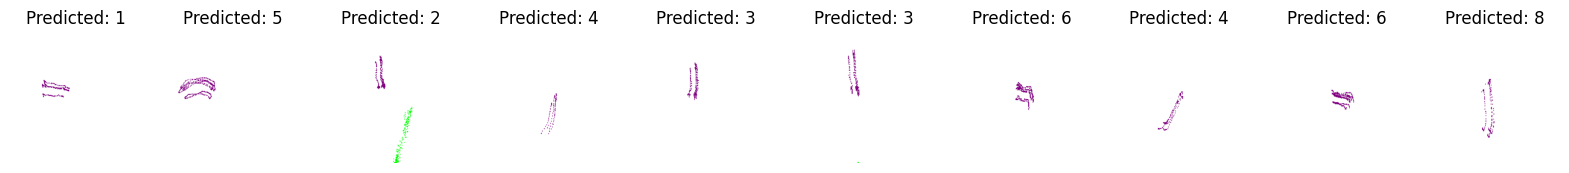

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Chọn ngẫu nhiên 5 mẫu từ tập kiểm tra
num_samples = 10
indices = np.random.choice(len(x_test), num_samples, replace=False)
samples = x_test[indices]

# Suy luận với mô hình
predictions = model.predict(samples)
predicted_labels = np.argmax(predictions, axis=1)

# Hiển thị ảnh và dự đoán
# Display the images and their predictions
fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(samples[i])  # Just use this, no reshape needed
    ax.set_title(f"Predicted: {predicted_labels[i] + 1}")
    ax.axis("off")

plt.show()



1/1 [==============================] - 0s 15ms/step


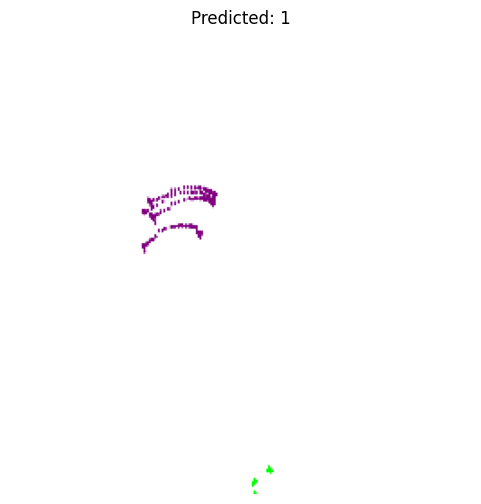

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def prepare_image(img_path):
    # Đọc hình ảnh sử dụng OpenCV
    img = cv2.imread(img_path)
    
    # Chuyển từ BGR sang RGB (vì OpenCV đọc ảnh trong không gian màu BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Resize ảnh về kích thước 256x256
    img_resized = cv2.resize(img, (256, 256))
    
    # Chia tỷ lệ giá trị pixel về khoảng [0, 1]
    img_resized = img_resized.astype("float32") / 255.0

    # Mở rộng chiều của ảnh (cho batch size = 1)
    img_array = np.expand_dims(img_resized, axis=0)
    
    return img_array

# Đường dẫn tới hình ảnh bạn muốn dự đoán
image_path = r"extracted_data\001_003_004.png"
image = prepare_image(image_path)

# Suy luận với mô hình
prediction = model.predict(image)
predicted_label = np.argmax(prediction, axis=1)

# Hiển thị hình ảnh và dự đoán
plt.figure(figsize=(6, 6))
plt.imshow(image[0])
plt.title(f"Predicted: {predicted_label[0] + 1}")
plt.axis("off")
plt.show()
